<a href="https://colab.research.google.com/github/asidosaputra/regression/blob/master/lin_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

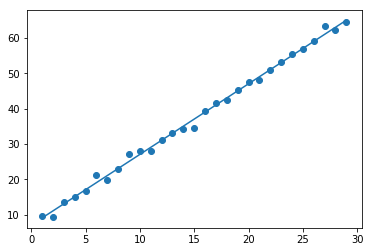

In [68]:
'''
Fungsi regressi digunakan untuk menentukan nilai gradien dan konstanta dari persamaan linear
dengan menggunakan persamaan least-square-error(LSE)
'''
class Linreg():
    def __init__(self, x_data, y_data):
        self._x_data = x_data
        self._y_data = y_data
        self._xbar = Linreg.mean_data(self._x_data)
        self._ybar = Linreg.mean_data(self._y_data)
        self._std_x = Linreg.std_data(self._x_data)
        self._std_y = Linreg.std_data(self._y_data)
        self.corr = Linreg.corr(
                self._x_data, self._y_data)
        self.coeffs = self.coeff
        self.corr   = self.corr

    def predict(self, x):
        y_predict=[]
        for i in x:
            y_predict.append(self.coeffs[0]*i + self.coeffs[1])
        
        return y_predict
    
    @property
    def coeff(self):
        theta_1 = self.corr * (self._std_y / self._std_x)
        theta_2 = self._ybar - theta_1 * self._xbar

        coef_reg = [theta_1, theta_2]
        return coef_reg
    
    @staticmethod
    def corr(x_data, y_data):
        xxbar_yybar = 0
        xxbar_2 = 0
        yybar_2 = 0
        xbar = Linreg.mean_data(x_data)
        ybar = Linreg.mean_data(y_data) 

        for x, y in zip(x_data, y_data):
            xxbar_yybar += (x-xbar) * (y - ybar)
            xxbar_2 += (x-xbar) ** 2
            yybar_2 += (y-ybar) ** 2

        ceoef_corr = xxbar_yybar / ((xxbar_2 ** (0.5)) * (yybar_2 ** (0.5)))

        return ceoef_corr


    @staticmethod
    def mean_data(data):
        sum_data = 0
        for elemen in data:
            sum_data += elemen

        N_data = len(data)
        coef_mean_data = sum_data/N_data

        return coef_mean_data

    @staticmethod
    def std_data(data):
        xbar = Linreg.mean_data(data)
        N_data = len(data)
        sum_x_xbar = 0
        for x in data:
            sum_x_xbar += (x-xbar) ** 2

        coef_std_data = (sum_x_xbar / N_data) ** (0.5)

        return coef_std_data


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    #data
    x_data = np.arange(1,30) 
    y_data = 2*x_data + 7 +  np.random.randn(29) 

    regresi = Linreg(x_data, y_data)


    y_pred = regresi.predict(x_data)
    coeff = regresi.coeff
    coorr = regresi.corr


    plt.scatter(x_data, y_data)
    plt.plot(x_data, y_pred)


